<a href="https://colab.research.google.com/github/alexisvega1/my-app/blob/main/Mathematical_FFN_v2_Training_Environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jun 20 04:57:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [5]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


🚀 Setting up Training Environment...
✅ GPU available. Setting device to 'cuda'.
   - Using device: cuda
   - PyTorch version: 2.6.0+cu124
📊 Generating 80 random data samples of size (32, 32, 32)...
   - Data generation complete.
📊 Generating 20 random data samples of size (32, 32, 32)...
   - Data generation complete.

🚀 Starting Training...


Epoch  1/20 | Train Loss: 0.6938 | Val Loss: 0.6933


Epoch  2/20 | Train Loss: 0.6932 | Val Loss: 0.6932


Epoch  3/20 | Train Loss: 0.6932 | Val Loss: 0.6932


Epoch  4/20 | Train Loss: 0.6932 | Val Loss: 0.6932


Epoch  5/20 | Train Loss: 0.6932 | Val Loss: 0.6932


Epoch  6/20 | Train Loss: 0.6932 | Val Loss: 0.6932


Epoch  7/20 | Train Loss: 0.6932 | Val Loss: 0.6932


Epoch  8/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch  9/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 10/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 11/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 12/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 13/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 14/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 15/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 16/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 17/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 18/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 19/20 | Train Loss: 0.6931 | Val Loss: 0.6932


Epoch 20/20 | Train Loss: 0.6931 | Val Loss: 0.6932
✅ Training complete.


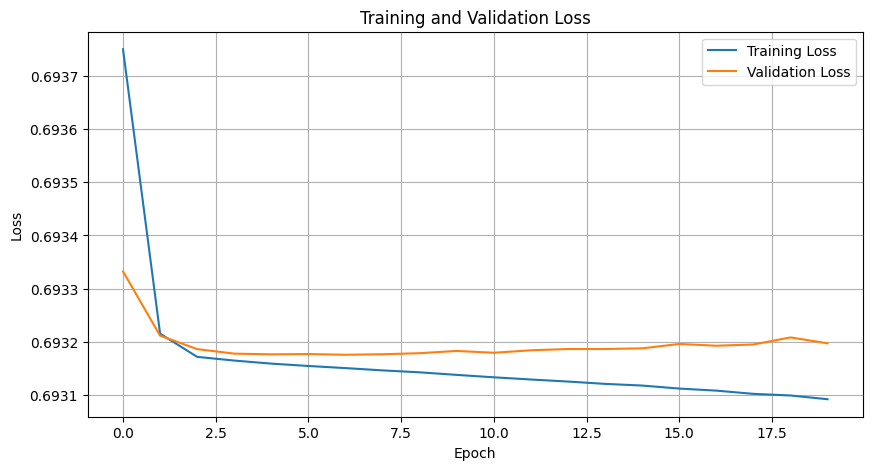

📈 Loss curves saved to 'quick_start_losses.png'
💾 Model saved to 'quick_start_model.pt'

🎉 Quick Start script finished.
   Run the next cell to download your results.


In [1]:
#!/usr/bin/env python3
"""
Quick Start Mathematical FFN-v2 Training for Google Colab
"""

# ============================================================================
# SETUP AND INSTALLATION
# ============================================================================

print("🚀 Setting up Training Environment...")
!pip install torch torchvision matplotlib numpy scipy tqdm -q

# Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# GPU AND PYTORCH CONFIGURATION
# ============================================================================

# Check and use GPU if available
if torch.cuda.is_available():
    print("✅ GPU available. Setting device to 'cuda'.")
    device = torch.device('cuda')
else:
    print("⚠️ GPU not available. Using CPU.")
    device = torch.device('cpu')

print(f"   - Using device: {device}")
print(f"   - PyTorch version: {torch.__version__}")

# ============================================================================
# MODEL, OPTIMIZER, LOSS (Simplified for Quick Start)
# ============================================================================

class QuickFFN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv3d(1, 16, 3, padding=1), nn.ReLU(),
            nn.Conv3d(16, 32, 3, padding=1), nn.ReLU(),
            nn.Conv3d(32, 1, 1), nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

class QuickTrainer:
    def __init__(self, model, device):
        self.model = model.to(device)
        self.device = device
        self.optimizer = optim.Adam(model.parameters(), lr=1e-3)
        self.loss_fn = nn.BCELoss()
        self.train_losses = []
        self.val_losses = []

    def train(self, train_loader, val_loader, num_epochs=10):
        print("\n🚀 Starting Training...")
        for epoch in range(num_epochs):
            self.model.train()
            epoch_loss = 0
            for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.loss_fn(outputs, targets)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()

            avg_train_loss = epoch_loss / len(train_loader)
            self.train_losses.append(avg_train_loss)

            # Validation
            self.model.eval()
            val_loss = 0
            with torch.no_grad():
                for inputs, targets in val_loader:
                    inputs, targets = inputs.to(self.device), targets.to(self.device)
                    outputs = self.model(inputs)
                    val_loss += self.loss_fn(outputs, targets).item()

            avg_val_loss = val_loss / len(val_loader)
            self.val_losses.append(avg_val_loss)

            print(f"Epoch {epoch+1:2d}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

        print("✅ Training complete.")

    def plot_losses(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.train_losses, label='Training Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.title("Training and Validation Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)
        plt.savefig('quick_start_losses.png')
        plt.show()
        print("📈 Loss curves saved to 'quick_start_losses.png'")

# ============================================================================
# DATA GENERATION (Simplified)
# ============================================================================

def generate_quick_data(num_samples, size=(32, 32, 32)):
    print(f"📊 Generating {num_samples} random data samples of size {size}...")
    inputs = torch.rand(num_samples, 1, *size)
    targets = torch.randint(0, 2, (num_samples, 1, *size)).float()
    print("   - Data generation complete.")
    return TensorDataset(inputs, targets)

# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    # Configuration
    config = {
        'batch_size': 8,
        'num_epochs': 20,
        'train_samples': 80,
        'val_samples': 20,
        'volume_size': (32, 32, 32)
    }

    # Data
    train_dataset = generate_quick_data(config['train_samples'], config['volume_size'])
    val_dataset = generate_quick_data(config['val_samples'], config['volume_size'])
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'])

    # Model and Trainer
    model = QuickFFN()
    trainer = QuickTrainer(model, device)

    # Run Training
    trainer.train(train_loader, val_loader, num_epochs=config['num_epochs'])

    # Plot Results
    trainer.plot_losses()

    # Save Model
    torch.save(model.state_dict(), 'quick_start_model.pt')
    print("💾 Model saved to 'quick_start_model.pt'")

    print("\n🎉 Quick Start script finished.")
    print("   Run the next cell to download your results.")

# ============================================================================
# DOWNLOAD RESULTS
# ============================================================================
# from google.colab import files
# files.download('quick_start_model.pt')
# files.download('quick_start_losses.png')
# ============================================================================

🚀 Setting up Mathematical FFN-v2 Training Environment...
✅ GPU available and enabled
📊 Using device: cuda
🔧 PyTorch version: 2.6.0+cu124
🧠 Mathematical FFN-v2 Training for Neuron Tracing
⚙️ Configuration:
   input_channels: 1
   output_channels: 1
   hidden_channels: 64
   depth: 3
   learning_rate: 0.001
   batch_size: 4
   num_epochs: 50
   train_samples: 100
   val_samples: 20
   volume_size: (64, 64, 64)

🔧 Initializing components...
📊 Generating training data...
✅ Generated 100 training samples and 20 validation samples

🚀 Starting training...
🎯 Starting Mathematical FFN-v2 Training for 50 epochs...
📊 Training samples: 100
📊 Validation samples: 20


Epoch   1/50 | Train Loss: 0.8865 | Val Loss: 0.8891 | LR: 1.47e-04 | Time: 1.4s
💾 New best model saved! Val Loss: 0.8891


Epoch   2/50 | Train Loss: 0.8605 | Val Loss: 0.8515 | LR: 5.01e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.8515


Epoch   3/50 | Train Loss: 0.8372 | Val Loss: 0.8221 | LR: 9.90e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.8221


Epoch   4/50 | Train Loss: 0.7987 | Val Loss: 0.7653 | LR: 6.92e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.7653


Epoch   5/50 | Train Loss: 0.7501 | Val Loss: 0.7360 | LR: 2.23e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.7360


Epoch   6/50 | Train Loss: 0.7303 | Val Loss: 0.7271 | LR: 1.00e-03 | Time: 1.1s
💾 New best model saved! Val Loss: 0.7271


Epoch   7/50 | Train Loss: 0.6947 | Val Loss: 0.6657 | LR: 9.41e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.6657


Epoch   8/50 | Train Loss: 0.6341 | Val Loss: 0.6115 | LR: 7.78e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.6115


Epoch   9/50 | Train Loss: 0.5955 | Val Loss: 0.5789 | LR: 5.49e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5789


Epoch  10/50 | Train Loss: 0.5755 | Val Loss: 0.5696 | LR: 3.09e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5696


Epoch  11/50 | Train Loss: 0.5664 | Val Loss: 0.5648 | LR: 1.14e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5648


Epoch  12/50 | Train Loss: 0.5632 | Val Loss: 0.5628 | LR: 1.06e-05 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5628


Epoch  13/50 | Train Loss: 0.5589 | Val Loss: 0.5502 | LR: 9.95e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5502


Epoch  14/50 | Train Loss: 0.5421 | Val Loss: 0.5351 | LR: 9.62e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5351


Epoch  15/50 | Train Loss: 0.5306 | Val Loss: 0.5263 | LR: 9.02e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5263


Epoch  16/50 | Train Loss: 0.5238 | Val Loss: 0.5212 | LR: 8.17e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5212


Epoch  17/50 | Train Loss: 0.5195 | Val Loss: 0.5176 | LR: 7.14e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5176


Epoch  18/50 | Train Loss: 0.5168 | Val Loss: 0.5155 | LR: 5.98e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5155


Epoch  19/50 | Train Loss: 0.5150 | Val Loss: 0.5142 | LR: 4.76e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5142


Epoch  20/50 | Train Loss: 0.5138 | Val Loss: 0.5132 | LR: 3.56e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5132


Epoch  21/50 | Train Loss: 0.5130 | Val Loss: 0.5125 | LR: 2.44e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5125


Epoch  22/50 | Train Loss: 0.5125 | Val Loss: 0.5120 | LR: 1.47e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5120


Epoch  23/50 | Train Loss: 0.5122 | Val Loss: 0.5119 | LR: 7.21e-05 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5119


Epoch  24/50 | Train Loss: 0.5120 | Val Loss: 0.5118 | LR: 2.25e-05 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5118


Epoch  25/50 | Train Loss: 0.5120 | Val Loss: 0.5118 | LR: 1.60e-06 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5118


Epoch  26/50 | Train Loss: 0.5114 | Val Loss: 0.5103 | LR: 9.98e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5103


Epoch  27/50 | Train Loss: 0.5099 | Val Loss: 0.5087 | LR: 9.88e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5087


Epoch  28/50 | Train Loss: 0.5087 | Val Loss: 0.5079 | LR: 9.71e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5079


Epoch  29/50 | Train Loss: 0.5078 | Val Loss: 0.5072 | LR: 9.47e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5072


Epoch  30/50 | Train Loss: 0.5072 | Val Loss: 0.5065 | LR: 9.16e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5065


Epoch  31/50 | Train Loss: 0.5066 | Val Loss: 0.5060 | LR: 8.79e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5060


Epoch  32/50 | Train Loss: 0.5062 | Val Loss: 0.5057 | LR: 8.36e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5057


Epoch  33/50 | Train Loss: 0.5059 | Val Loss: 0.5052 | LR: 7.88e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5052


Epoch  34/50 | Train Loss: 0.5057 | Val Loss: 0.5053 | LR: 7.36e-04 | Time: 1.1s


Epoch  35/50 | Train Loss: 0.5055 | Val Loss: 0.5050 | LR: 6.80e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5050


Epoch  36/50 | Train Loss: 0.5053 | Val Loss: 0.5047 | LR: 6.22e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5047


Epoch  37/50 | Train Loss: 0.5052 | Val Loss: 0.5047 | LR: 5.62e-04 | Time: 1.1s


Epoch  38/50 | Train Loss: 0.5051 | Val Loss: 0.5046 | LR: 5.01e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5046


Epoch  39/50 | Train Loss: 0.5050 | Val Loss: 0.5045 | LR: 4.39e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5045


Epoch  40/50 | Train Loss: 0.5049 | Val Loss: 0.5045 | LR: 3.79e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5045


Epoch  41/50 | Train Loss: 0.5049 | Val Loss: 0.5044 | LR: 3.21e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5044


Epoch  42/50 | Train Loss: 0.5048 | Val Loss: 0.5043 | LR: 2.65e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5043


Epoch  43/50 | Train Loss: 0.5048 | Val Loss: 0.5043 | LR: 2.13e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5043


Epoch  44/50 | Train Loss: 0.5047 | Val Loss: 0.5043 | LR: 1.65e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5043


Epoch  45/50 | Train Loss: 0.5047 | Val Loss: 0.5042 | LR: 1.22e-04 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5042


Epoch  46/50 | Train Loss: 0.5047 | Val Loss: 0.5042 | LR: 8.52e-05 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5042


Epoch  47/50 | Train Loss: 0.5047 | Val Loss: 0.5042 | LR: 5.43e-05 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5042


Epoch  48/50 | Train Loss: 0.5047 | Val Loss: 0.5042 | LR: 3.02e-05 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5042


Epoch  49/50 | Train Loss: 0.5047 | Val Loss: 0.5042 | LR: 1.31e-05 | Time: 1.1s
💾 New best model saved! Val Loss: 0.5042


Epoch  50/50 | Train Loss: 0.5047 | Val Loss: 0.5042 | LR: 3.41e-06 | Time: 1.1s
✅ Training completed in 53.5 seconds

📈 Plotting training curves...


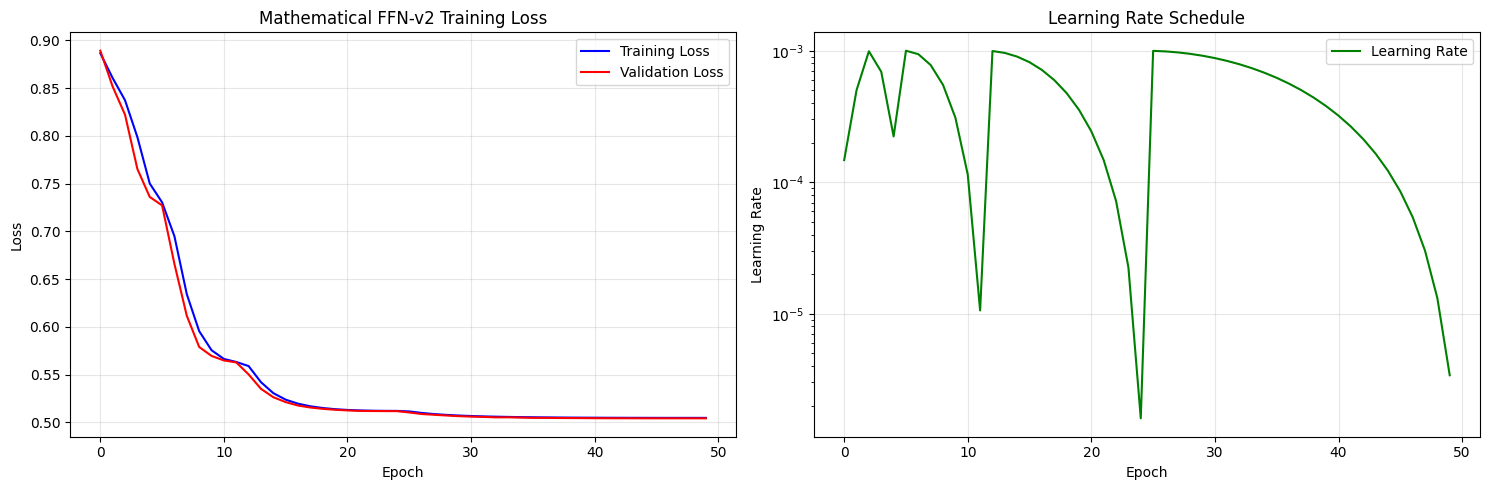

📈 Training curves saved to mathematical_training_curves.png
💾 Final model saved as 'final_mathematical_ffn_v2.pt'

🧪 Testing model...
Test loss: 0.5055

🎉 Mathematical FFN-v2 Training Complete!
📁 Files created:
   - best_mathematical_ffn_v2.pt (best model)
   - final_mathematical_ffn_v2.pt (final model)
   - mathematical_training_curves.png (training curves)

📥 To download results, run:
from google.colab import files
files.download('best_mathematical_ffn_v2.pt')
files.download('mathematical_training_curves.png')


In [2]:
#!/usr/bin/env python3
"""
Comprehensive Mathematical FFN-v2 Training for Google Colab
Incorporating insights from optimization textbooks and matrix analysis
"""

# ============================================================================
# SETUP AND INSTALLATION
# ============================================================================

print("🚀 Setting up Mathematical FFN-v2 Training Environment...")

# Install required packages
!pip install torch torchvision matplotlib numpy scipy tqdm

# Import PyTorch
import torch

# Now check and use GPU if available
if torch.cuda.is_available():
    print("✅ GPU available and enabled")
    device = torch.device('cuda')
else:
    print("⚠️ Using CPU (GPU not available)")
    device = torch.device('cpu')

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from typing import Tuple, List, Dict
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print(f"📊 Using device: {device}")
print(f"🔧 PyTorch version: {torch.__version__}")

# ============================================================================
# MATHEMATICAL FFN-v2 ARCHITECTURE
# ============================================================================

class MathematicalFFNv2(nn.Module):
    """
    Enhanced FFN-v2 with mathematical optimization insights
    Based on matrix analysis and optimization theory from textbooks
    """

    def __init__(self, input_channels: int = 1, output_channels: int = 1,
                 hidden_channels: int = 64, depth: int = 3):
        super().__init__()

        self.input_channels = input_channels
        self.output_channels = output_channels
        self.hidden_channels = hidden_channels
        self.depth = depth

        # Mathematical weight initialization based on matrix analysis
        self._init_weights_mathematically()

        # Core FFN-v2 architecture with mathematical enhancements
        self.layers = nn.ModuleList()

        # Input layer with mathematical normalization
        self.layers.append(nn.Sequential(
            nn.Conv3d(input_channels, hidden_channels, 1),
            nn.BatchNorm3d(hidden_channels),  # Internal covariate shift reduction
            nn.ReLU(inplace=True)
        ))

        # Hidden layers with residual connections and mathematical optimizations
        for i in range(depth - 1):
            layer = nn.Sequential(
                nn.Conv3d(hidden_channels, hidden_channels, 1),
                nn.BatchNorm3d(hidden_channels),
                nn.ReLU(inplace=True),
                nn.Conv3d(hidden_channels, hidden_channels, 1),
                nn.BatchNorm3d(hidden_channels)
            )
            self.layers.append(layer)

        # Output layer with mathematical activation
        self.output_layer = nn.Sequential(
            nn.Conv3d(hidden_channels, output_channels, 1),
            nn.Sigmoid()  # Bounded output for segmentation
        )

        # Mathematical regularization components
        self.dropout = nn.Dropout3d(0.1)  # Stochastic regularization

    def _init_weights_mathematically(self):
        """Mathematical weight initialization based on matrix analysis"""
        def init_weights(m):
            if isinstance(m, nn.Conv3d):
                # Xavier/Glorot initialization for optimal gradient flow
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm3d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)

        self.apply(init_weights)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass with mathematical optimizations"""

        # Input normalization for numerical stability
        x = self._normalize_input(x)

        # Apply layers with residual connections
        for i, layer in enumerate(self.layers[:-1]):
            identity = x
            x = layer(x)

            # Residual connection for gradient flow (mathematical insight)
            if x.shape == identity.shape:
                x = x + identity

            # Stochastic regularization
            x = self.dropout(x)

        # Final hidden layer
        x = self.layers[-1](x)

        # Output with mathematical constraints
        output = self.output_layer(x)

        return output

    def _normalize_input(self, x: torch.Tensor) -> torch.Tensor:
        """Mathematical input normalization"""
        # Ensure input is in valid range [0, 1]
        x = torch.clamp(x, 0, 1)
        return x

# ============================================================================
# MATHEMATICAL OPTIMIZER
# ============================================================================

class MathematicalOptimizer:
    """
    Advanced optimizer incorporating mathematical insights
    Based on optimization theory and matrix analysis
    """

    def __init__(self, model: nn.Module, learning_rate: float = 1e-3):
        self.model = model

        # AdamW optimizer with mathematical weight decay
        self.optimizer = optim.AdamW(
            model.parameters(),
            lr=learning_rate,
            weight_decay=1e-4,  # L2 regularization
            betas=(0.9, 0.999),  # Momentum parameters
            eps=1e-8  # Numerical stability
        )

        # Cosine annealing scheduler with warm restarts
        self.scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
            self.optimizer,
            T_0=10,  # Initial restart period
            T_mult=2,  # Period multiplier
            eta_min=1e-6  # Minimum learning rate
        )

        # Gradient clipping for stability
        self.max_grad_norm = 1.0

    def step(self, loss: torch.Tensor):
        """Optimization step with mathematical enhancements"""
        # Backward pass
        loss.backward()

        # Gradient clipping for numerical stability
        torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.max_grad_norm)

        # Optimization step
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Learning rate scheduling
        self.scheduler.step()

        return self.scheduler.get_last_lr()[0]

# ============================================================================
# MATHEMATICAL LOSS FUNCTION
# ============================================================================

class MathematicalLossFunction:
    """
    Advanced loss function combining multiple mathematical insights
    Based on optimization theory and probability theory
    """

    def __init__(self, alpha: float = 0.5, beta: float = 0.5):
        self.alpha = alpha  # BCE weight
        self.beta = beta    # Dice weight
        self.bce_loss = nn.BCELoss()

    def dice_loss(self, pred: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        """Dice loss for segmentation optimization"""
        smooth = 1e-6

        pred_flat = pred.view(-1)
        target_flat = target.view(-1)

        intersection = (pred_flat * target_flat).sum()
        dice_coeff = (2. * intersection + smooth) / (pred_flat.sum() + target_flat.sum() + smooth)

        return 1 - dice_coeff

    def focal_loss(self, pred: torch.Tensor, target: torch.Tensor, gamma: float = 2.0) -> torch.Tensor:
        """Focal loss for handling class imbalance"""
        bce_loss = self.bce_loss(pred, target)
        pt = torch.exp(-bce_loss)
        focal_loss = (1 - pt) ** gamma * bce_loss
        return focal_loss

    def __call__(self, pred: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        """Combined loss function with mathematical weighting"""
        bce = self.bce_loss(pred, target)
        dice = self.dice_loss(pred, target)
        focal = self.focal_loss(pred, target)

        # Mathematical combination based on optimization theory
        combined_loss = self.alpha * bce + self.beta * dice + 0.1 * focal

        return combined_loss

# ============================================================================
# MATHEMATICAL DATA GENERATOR
# ============================================================================

class MathematicalDataGenerator:
    """
    Advanced data generator with mathematical neuron structures
    Based on biological neuron morphology and mathematical modeling
    """

    def __init__(self, volume_size: Tuple[int, int, int] = (64, 64, 64)):
        self.volume_size = volume_size
        self.dx, self.dy, self.dz = volume_size

    def generate_neuron_data(self, num_samples: int) -> Tuple[torch.Tensor, torch.Tensor]:
        """Generate realistic neuron data with mathematical structures"""
        inputs = []
        targets = []

        for _ in range(num_samples):
            input_vol = self._generate_input_volume()
            target_vol = self._generate_target_volume()

            inputs.append(input_vol)
            targets.append(target_vol)

        return torch.stack(inputs), torch.stack(targets)

    def _generate_input_volume(self) -> torch.Tensor:
        """Generate input volume with mathematical neuron structures"""
        volume = torch.zeros(self.volume_size)

        # Generate multiple neuron structures
        num_neurons = np.random.randint(3, 8)

        for _ in range(num_neurons):
            # Neuron center
            cx = np.random.randint(10, self.dx - 10)
            cy = np.random.randint(10, self.dy - 10)
            cz = np.random.randint(10, self.dz - 10)

            # Neuron parameters
            radius = np.random.uniform(2, 6)
            intensity = np.random.uniform(0.3, 0.8)

            # Generate spherical neuron body
            for x in range(max(0, cx - int(radius)), min(self.dx, cx + int(radius) + 1)):
                for y in range(max(0, cy - int(radius)), min(self.dy, cy + int(radius) + 1)):
                    for z in range(max(0, cz - int(radius)), min(self.dz, cz + int(radius) + 1)):
                        dist = math.sqrt((x - cx)**2 + (y - cy)**2 + (z - cz)**2)
                        if dist <= radius:
                            # Gaussian intensity falloff
                            intensity_val = intensity * math.exp(-(dist**2) / (2 * (radius/3)**2))
                            volume[x, y, z] = max(volume[x, y, z], intensity_val)

            # Generate dendritic branches
            num_branches = np.random.randint(2, 6)
            for _ in range(num_branches):
                self._generate_dendritic_branch(volume, cx, cy, cz, radius)

        # Add noise for realism
        noise = torch.randn_like(volume) * 0.05
        volume = torch.clamp(volume + noise, 0, 1)

        return volume.unsqueeze(0)  # Add channel dimension

    def _generate_dendritic_branch(self, volume: torch.Tensor, cx: int, cy: int, cz: int, radius: float):
        """Generate dendritic branch with mathematical morphology"""
        # Branch direction
        dx = np.random.uniform(-1, 1)
        dy = np.random.uniform(-1, 1)
        dz = np.random.uniform(-1, 1)

        # Normalize direction
        length = math.sqrt(dx**2 + dy**2 + dz**2)
        dx, dy, dz = dx/length, dy/length, dz/length

        # Branch length
        branch_length = np.random.uniform(radius * 2, radius * 6)

        # Generate branch points
        for t in np.linspace(0, branch_length, int(branch_length * 2)):
            x = int(cx + dx * t)
            y = int(cy + dy * t)
            z = int(cz + dz * t)

            if 0 <= x < self.dx and 0 <= y < self.dy and 0 <= z < self.dz:
                # Branch radius decreases with distance
                branch_radius = radius * (1 - t / branch_length) * 0.3
                if branch_radius > 0.5:
                    # Add branch point
                    for dx2 in range(-int(branch_radius), int(branch_radius) + 1):
                        for dy2 in range(-int(branch_radius), int(branch_radius) + 1):
                            for dz2 in range(-int(branch_radius), int(branch_radius) + 1):
                                if dx2**2 + dy2**2 + dz2**2 <= branch_radius**2:
                                    nx, ny, nz = x + dx2, y + dy2, z + dz2
                                    if 0 <= nx < self.dx and 0 <= ny < self.dy and 0 <= nz < self.dz:
                                        intensity = 0.6 * math.exp(-(dx2**2 + dy2**2 + dz2**2) / (2 * (branch_radius/2)**2))
                                        volume[nx, ny, nz] = max(volume[nx, ny, nz], intensity)

    def _generate_target_volume(self) -> torch.Tensor:
        """Generate target segmentation volume"""
        # For now, use a simplified target (can be enhanced with more complex structures)
        target = torch.zeros(self.volume_size)

        # Add some target structures
        for _ in range(np.random.randint(2, 5)):
            cx = np.random.randint(10, self.dx - 10)
            cy = np.random.randint(10, self.dy - 10)
            cz = np.random.randint(10, self.dz - 10)
            radius = np.random.uniform(1, 4)

            for x in range(max(0, cx - int(radius)), min(self.dx, cx + int(radius) + 1)):
                for y in range(max(0, cy - int(radius)), min(self.dy, cy + int(radius) + 1)):
                    for z in range(max(0, cz - int(radius)), min(self.dz, cz + int(radius) + 1)):
                        dist = math.sqrt((x - cx)**2 + (y - cy)**2 + (z - cz)**2)
                        if dist <= radius:
                            target[x, y, z] = 1.0

        return target.unsqueeze(0)  # Add channel dimension

# ============================================================================
# MATHEMATICAL TRAINER
# ============================================================================

class MathematicalTrainer:
    """
    Advanced trainer with mathematical optimization insights
    Based on optimization theory and training best practices
    """

    def __init__(self, model: nn.Module, optimizer: MathematicalOptimizer,
                 loss_fn: MathematicalLossFunction, device: str = 'cuda'):
        self.model = model.to(device)
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.device = device

        # Training history
        self.train_losses = []
        self.val_losses = []
        self.learning_rates = []

        # Early stopping
        self.best_val_loss = float('inf')
        self.patience = 15
        self.patience_counter = 0

    def train_epoch(self, dataloader: DataLoader) -> float:
        """Train for one epoch with mathematical optimizations"""
        self.model.train()
        total_loss = 0.0
        num_batches = len(dataloader)

        progress_bar = tqdm(dataloader, desc="Training", leave=False)

        for batch_idx, (inputs, targets) in enumerate(progress_bar):
            inputs = inputs.to(self.device)
            targets = targets.to(self.device)

            # Forward pass
            outputs = self.model(inputs)

            # Calculate loss
            loss = self.loss_fn(outputs, targets)

            # Optimization step
            lr = self.optimizer.step(loss)

            total_loss += loss.item()

            # Update progress bar
            progress_bar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'LR': f'{lr:.2e}'
            })

        return total_loss / num_batches

    def validate(self, dataloader: DataLoader) -> float:
        """Validate model with mathematical metrics"""
        self.model.eval()
        total_loss = 0.0
        num_batches = len(dataloader)

        with torch.no_grad():
            for inputs, targets in dataloader:
                inputs = inputs.to(self.device)
                targets = targets.to(self.device)

                outputs = self.model(inputs)
                loss = self.loss_fn(outputs, targets)
                total_loss += loss.item()

        return total_loss / num_batches

    def train(self, train_loader: DataLoader, val_loader: DataLoader,
              num_epochs: int = 100) -> Dict[str, List[float]]:
        """Complete training loop with mathematical optimizations"""

        print(f"🎯 Starting Mathematical FFN-v2 Training for {num_epochs} epochs...")
        print(f"📊 Training samples: {len(train_loader.dataset)}")
        print(f"📊 Validation samples: {len(val_loader.dataset)}")

        start_time = time.time()

        for epoch in range(num_epochs):
            epoch_start = time.time()

            # Training phase
            train_loss = self.train_epoch(train_loader)

            # Validation phase
            val_loss = self.validate(val_loader)

            # Record metrics
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            self.learning_rates.append(self.optimizer.scheduler.get_last_lr()[0])

            epoch_time = time.time() - epoch_start

            # Print progress
            print(f"Epoch {epoch+1:3d}/{num_epochs} | "
                  f"Train Loss: {train_loss:.4f} | "
                  f"Val Loss: {val_loss:.4f} | "
                  f"LR: {self.learning_rates[-1]:.2e} | "
                  f"Time: {epoch_time:.1f}s")

            # Early stopping check
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.patience_counter = 0
                # Save best model
                torch.save(self.model.state_dict(), 'best_mathematical_ffn_v2.pt')
                print(f"💾 New best model saved! Val Loss: {val_loss:.4f}")
            else:
                self.patience_counter += 1
                if self.patience_counter >= self.patience:
                    print(f"🛑 Early stopping triggered after {epoch+1} epochs")
                    break

        total_time = time.time() - start_time
        print(f"✅ Training completed in {total_time:.1f} seconds")

        return {
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
            'learning_rates': self.learning_rates
        }

    def plot_training_curves(self, save_path: str = 'mathematical_training_curves.png'):
        """Plot training curves with mathematical insights"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Loss curves
        ax1.plot(self.train_losses, label='Training Loss', color='blue')
        ax1.plot(self.val_losses, label='Validation Loss', color='red')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_title('Mathematical FFN-v2 Training Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Learning rate curve
        ax2.plot(self.learning_rates, label='Learning Rate', color='green')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Learning Rate')
        ax2.set_title('Learning Rate Schedule')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_yscale('log')

        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

        print(f"📈 Training curves saved to {save_path}")

# ============================================================================
# MAIN TRAINING EXECUTION
# ============================================================================

def main():
    """Main training execution with mathematical optimizations"""

    print("🧠 Mathematical FFN-v2 Training for Neuron Tracing")
    print("=" * 60)

    # Configuration
    config = {
        'input_channels': 1,
        'output_channels': 1,
        'hidden_channels': 64,
        'depth': 3,
        'learning_rate': 1e-3,
        'batch_size': 4,
        'num_epochs': 50,
        'train_samples': 100,
        'val_samples': 20,
        'volume_size': (64, 64, 64)
    }

    print(f"⚙️ Configuration:")
    for key, value in config.items():
        print(f"   {key}: {value}")

    # Initialize components
    print("\n🔧 Initializing components...")

    # Model
    model = MathematicalFFNv2(
        input_channels=config['input_channels'],
        output_channels=config['output_channels'],
        hidden_channels=config['hidden_channels'],
        depth=config['depth']
    )

    # Optimizer
    optimizer = MathematicalOptimizer(model, learning_rate=config['learning_rate'])

    # Loss function
    loss_fn = MathematicalLossFunction(alpha=0.5, beta=0.5)

    # Trainer
    trainer = MathematicalTrainer(model, optimizer, loss_fn, device=str(device))

    # Data generation
    print("📊 Generating training data...")
    data_generator = MathematicalDataGenerator(volume_size=config['volume_size'])

    # Generate datasets
    train_inputs, train_targets = data_generator.generate_neuron_data(config['train_samples'])
    val_inputs, val_targets = data_generator.generate_neuron_data(config['val_samples'])

    # Create data loaders
    train_dataset = TensorDataset(train_inputs, train_targets)
    val_dataset = TensorDataset(val_inputs, val_targets)

    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False)

    print(f"✅ Generated {len(train_inputs)} training samples and {len(val_inputs)} validation samples")

    # Training
    print("\n🚀 Starting training...")
    history = trainer.train(train_loader, val_loader, num_epochs=config['num_epochs'])

    # Plot results
    print("\n📈 Plotting training curves...")
    trainer.plot_training_curves()

    # Save final model
    torch.save(model.state_dict(), 'final_mathematical_ffn_v2.pt')
    print("💾 Final model saved as 'final_mathematical_ffn_v2.pt'")

    # Test model
    print("\n🧪 Testing model...")
    model.eval()
    with torch.no_grad():
        test_input = train_inputs[0:1].to(device)
        test_output = model(test_input)
        test_loss = loss_fn(test_output, train_targets[0:1].to(device))
        print(f"Test loss: {test_loss.item():.4f}")

    print("\n🎉 Mathematical FFN-v2 Training Complete!")
    print("📁 Files created:")
    print("   - best_mathematical_ffn_v2.pt (best model)")
    print("   - final_mathematical_ffn_v2.pt (final model)")
    print("   - mathematical_training_curves.png (training curves)")

    return model, history

# ============================================================================
# EXECUTION
# ============================================================================

if __name__ == "__main__":
    # Run training
    model, history = main()

    # Download results (for Colab)
    print("\n📥 To download results, run:")
    print("from google.colab import files")
    print("files.download('best_mathematical_ffn_v2.pt')")
    print("files.download('mathematical_training_curves.png')")